<a href="https://colab.research.google.com/github/gulcihanglmz/pattern-recognition-final-project/blob/main/fruit_ripeness_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os


In [46]:
dataset_path = '/content/gdrive/MyDrive/fruit-dataset'

In [58]:
import os
from PIL import Image

def kontrol_et_ve_sil(dizin):
    for klasor, alt_klasorler, dosyalar in os.walk(dizin):
        for dosya in dosyalar:
            dosya_yolu = os.path.join(klasor, dosya)
            try:
                # Görselin açılıp açılamadığını kontrol et
                with Image.open(dosya_yolu) as img:
                    img.verify()  # Görseli doğrula
            except Exception as e:
                print(f"Hatalı dosya bulundu ve siliniyor: {dosya_yolu} - {e}")
                os.remove(dosya_yolu)  # Hatalı dosyayı sil

# Train ve Test dizinlerini kontrol et ve hatalı dosyaları sil
kontrol_et_ve_sil("/content/gdrive/MyDrive/fruit-dataset/train")
kontrol_et_ve_sil("/content/gdrive/MyDrive/fruit-dataset/test")

print("Hatalı dosyalar silindi ve işlem tamamlandı.")


Hatalı dosya bulundu ve siliniyor: /content/gdrive/MyDrive/fruit-dataset/train/Fresh-Carrot/Carrot59.jpg - cannot identify image file '/content/gdrive/MyDrive/fruit-dataset/train/Fresh-Carrot/Carrot59.jpg'
Hatalı dosya bulundu ve siliniyor: /content/gdrive/MyDrive/fruit-dataset/train/Fresh-Carrot/Carrot74.jpg - cannot identify image file '/content/gdrive/MyDrive/fruit-dataset/train/Fresh-Carrot/Carrot74.jpg'
Hatalı dosya bulundu ve siliniyor: /content/gdrive/MyDrive/fruit-dataset/train/Fresh-Carrot/Carrot8.jpg - cannot identify image file '/content/gdrive/MyDrive/fruit-dataset/train/Fresh-Carrot/Carrot8.jpg'
Hatalı dosya bulundu ve siliniyor: /content/gdrive/MyDrive/fruit-dataset/train/Rotten-Carrot/CarrotR11.jpg - cannot identify image file '/content/gdrive/MyDrive/fruit-dataset/train/Rotten-Carrot/CarrotR11.jpg'
Hatalı dosya bulundu ve siliniyor: /content/gdrive/MyDrive/fruit-dataset/train/Rotten-Carrot/CarrotR34.jpg - cannot identify image file '/content/gdrive/MyDrive/fruit-dataset

In [48]:
import os
from PIL import Image

def check_and_remove_corrupted_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                # Resmi açmayı deneyin
                img = Image.open(file_path)
                img.verify()  # Dosyanın bozuk olup olmadığını kontrol et
            except (IOError, SyntaxError):
                print(f"Bozuk dosya silindi: {file_path}")
                os.remove(file_path)  # Bozuk dosyayı sil

# Eğitim ve test klasörlerini kontrol et
check_and_remove_corrupted_images('/content/fruit-dataset/train')
check_and_remove_corrupted_images('/content/fruit-dataset/test')


In [59]:
# Resim boyutu ve batch size
img_size = (128, 128)
batch_size = 32

train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

# Veri artırma ve ölçekleme
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Eğitim verisi normalizasyonu
test_datagen = ImageDataGenerator(rescale=1.0/255)   # Test verisi normalizasyonu

# Eğitim verisi oluşturucu
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resim boyutları (CNN için uygun hale getiriliyor)
    batch_size=32,
    class_mode='categorical'  # Sınıflar kategorik olarak ayrılacak
)

# Test verisi oluşturucu
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2036 images belonging to 10 classes.
Found 528 images belonging to 10 classes.


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # İlk giriş katmanı
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # Çıkışı düzleştirme
    Dense(128, activation='relu'),  # Tam bağlı katman
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Çıkış katmanı
])


In [61]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [64]:
import os
from PIL import Image

def validate_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Dosyanın okunabilirliğini kontrol eder
            except Exception as e:
                print(f"Bozuk veya geçersiz dosya: {file_path} - Hata: {e}")

# Klasörünüzün yolunu buraya yazın
validate_images('/path/to/fruit-dataset')


In [83]:
# Modelin eğitim süreci
history = model.fit(
    train_generator,  # Eğitim verisi
    steps_per_epoch=train_generator.samples // batch_size,  # Bir adımda kaç örnek işleneceği
    epochs=25,  # Eğitim dönemi sayısı
    validation_data=test_generator,  # Test verisi
    validation_steps=test_generator.samples // batch_size,  # Her doğrulama adımında işlenecek örnek sayısı
    verbose=1  # Eğitim ilerlemesi hakkında bilgi verir
)

# Eğitim sonuçlarını yazdırma
print("Eğitim tamamlandı.")


Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - accuracy: 0.8595 - loss: 0.3973 - val_accuracy: 0.8730 - val_loss: 0.3735
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9375 - loss: 0.2290 - val_accuracy: 0.8750 - val_loss: 0.3177
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 314s 4s/step - accuracy: 0.8958 - loss: 0.3158 - val_accuracy: 0.8965 - val_loss: 0.3149
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8750 - loss: 0.3845 - val_accuracy: 0.8750 - val_loss: 0.2753
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 316s 4s/step - accuracy: 0.8878 - loss: 0.3079 - val_accuracy: 0.9043 - val_loss: 0.3373
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9375 - loss: 0.2503 - val_accuracy: 0.8750 - val_loss: 0.2185
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.9028 - loss: 0.2587 - val_accuracy: 0.8965 - val_loss: 0.3535
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9688 - loss: 0.1238 - val_accuracy: 0.8750 - val_l

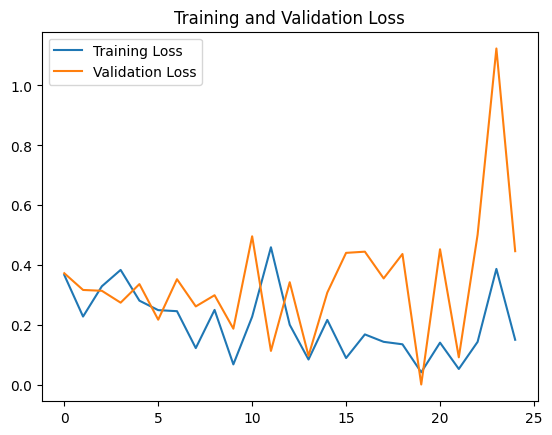

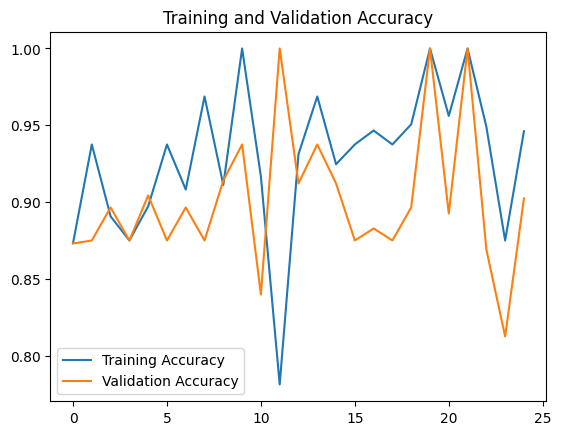

In [84]:
# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [85]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9027 - loss: 0.4420
Test Loss: 0.43877968192100525
Test Accuracy: 0.9034090638160706


In [78]:
pip install --upgrade Pillow

In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image
from PIL import UnidentifiedImageError  # Hatalı resimleri kontrol etmek için

def test_model_on_directory(model, directory_path, img_size=(224, 224)):
    # Klasördeki tüm resim dosyalarını kontrol et
    for img_name in os.listdir(directory_path):
        img_path = os.path.join(directory_path, img_name)

        # Resim dosyasını kontrol et (jpg, png, jpeg vb.)
        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):

            try:
                # Resmi yükle ve uygun boyutlandırma işlemi yap
                img = image.load_img(img_path, target_size=img_size)
                img_array = image.img_to_array(img)  # Görüntüyü diziye çevir
                img_array = np.expand_dims(img_array, axis=0)  # Batch boyutu ekle (1, img_size, img_size, 3)
                img_array = img_array / 255.0  # Normalizasyon işlemi

                # Model ile tahmin yap
                predictions = model.predict(img_array)

                # Tahmin edilen sınıf
                predicted_class = np.argmax(predictions, axis=1)[0]

                # Tahminin güven oranı
                confidence = predictions[0][predicted_class] * 100

                # Sınıf etiketini al (train_generator'dan gelen sınıf isimlerine göre)
                class_labels = list(train_generator.class_indices.keys())
                predicted_class_label = class_labels[predicted_class]

                # Sonucu yazdır
                print(f"Image: {img_name} -> Predicted class: {predicted_class_label} with {confidence:.2f}% confidence")

            except UnidentifiedImageError:
                print(f"Bozuk dosya veya geçersiz resim: {img_name}")
            except Exception as e:
                print(f"Resim işlenirken hata oluştu: {img_name} - {e}")

# Örnek kullanım:
directory_path = '/content/gdrive/MyDrive/test_images'  # Resimlerin bulunduğu klasörün yolu
test_model_on_directory(model, directory_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: BananaF10.jpg -> Predicted class: Fresh-Carrot with 53.58% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Image: FreshApple.jpg -> Predicted class: Fresh-Grape with 76.33% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: FreshApple4.jpg -> Predicted class: Fresh-Grape with 98.87% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: FreshApple6.jpg -> Predicted class: Fresh-Grape with 98.89% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: FrshApple10.jpg -> Predicted class: Fresh-Carrot with 65.82% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: FreshApple7.jpg -> Predicted class: Fresh-Grape with 97.54% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: FreshApple5.jpg -> Predicted class: Fresh-Carrot with 99.61% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Image: FreshApple9.jpg -> Predicted class: Fresh-Grape with 72.68% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Image: BananaF2.jpeg -> Predicted 